In [39]:
!python -m pip install pandas
!python -m pip install matplotlib
!python -m pip install seaborn 
!python -m pip install pickleshare



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
df = pd.read_csv('Data/Miami_Accidents(Clean).csv')

In [42]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-3445214,2,2016-11-30 16:35:52,2016-11-30 16:35:52,25.786010,-80.258090,25.783360,-80.269110,0.710,At SR-953/42nd Ave/Le Jeune Rd - Accident.,...,False,False,False,False,False,False,False,False,False,Day
1,A-3445282,2,2016-11-30 18:35:52,2016-11-30 18:35:52,25.662140,-80.388600,25.652920,-80.387120,0.644,At 120th St/Exit 19 - Accident.,...,False,False,False,False,False,False,False,False,False,Night
2,A-3445359,2,2016-12-01 05:51:51,2016-12-01 05:51:51,25.970530,-80.165760,25.959950,-80.168700,0.753,At Ives Dairy Rd/203rd St/Exit 16 - Accident.,...,False,False,False,False,False,False,False,False,False,Night
3,A-3445360,3,2016-12-01 06:03:23,2016-12-01 06:03:23,25.784470,-80.293460,25.784880,-80.284440,0.562,At SR-959/Red Rd - Accident.,...,False,False,False,False,False,False,False,False,False,Night
4,A-3445444,2,2016-12-01 08:21:46,2016-12-01 08:21:46,25.913100,-80.210240,25.907800,-80.210230,0.366,At 151st St/Exit 11 - Accident.,...,False,False,False,False,False,False,False,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122423,A-7776983,2,2019-08-22 17:10:33,2019-08-22 17:10:33,25.707554,-80.285429,25.708083,-80.284736,0.057,At SR-959/Red Rd/57th Ave - Accident.,...,False,False,False,False,False,False,False,True,False,Day
122424,A-7776984,4,2019-08-22 17:12:48,2019-08-22 17:12:48,25.909390,-80.209870,25.912360,-80.209700,0.205,Ramp closed to 151st St/Exit 11 - Road closed ...,...,True,False,False,False,False,False,False,False,False,Day
122425,A-7777410,4,2019-08-23 02:01:46,2019-08-23 02:01:46,25.927371,-80.212694,25.927371,-80.212694,0.000,Ramp to SR-826/Florida's Tpke/R Reagan Tpke - ...,...,False,False,False,False,False,False,False,False,False,Night
122426,A-7777424,2,2019-08-23 13:08:31,2019-08-23 13:08:31,25.812250,-80.237460,25.812460,-80.243590,0.382,At SR-9/27th Ave/Unity Blvd - Accident. Right ...,...,True,False,False,False,False,False,False,False,False,Day


In [43]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street',
       'Zipcode', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset'],
      dtype='object')

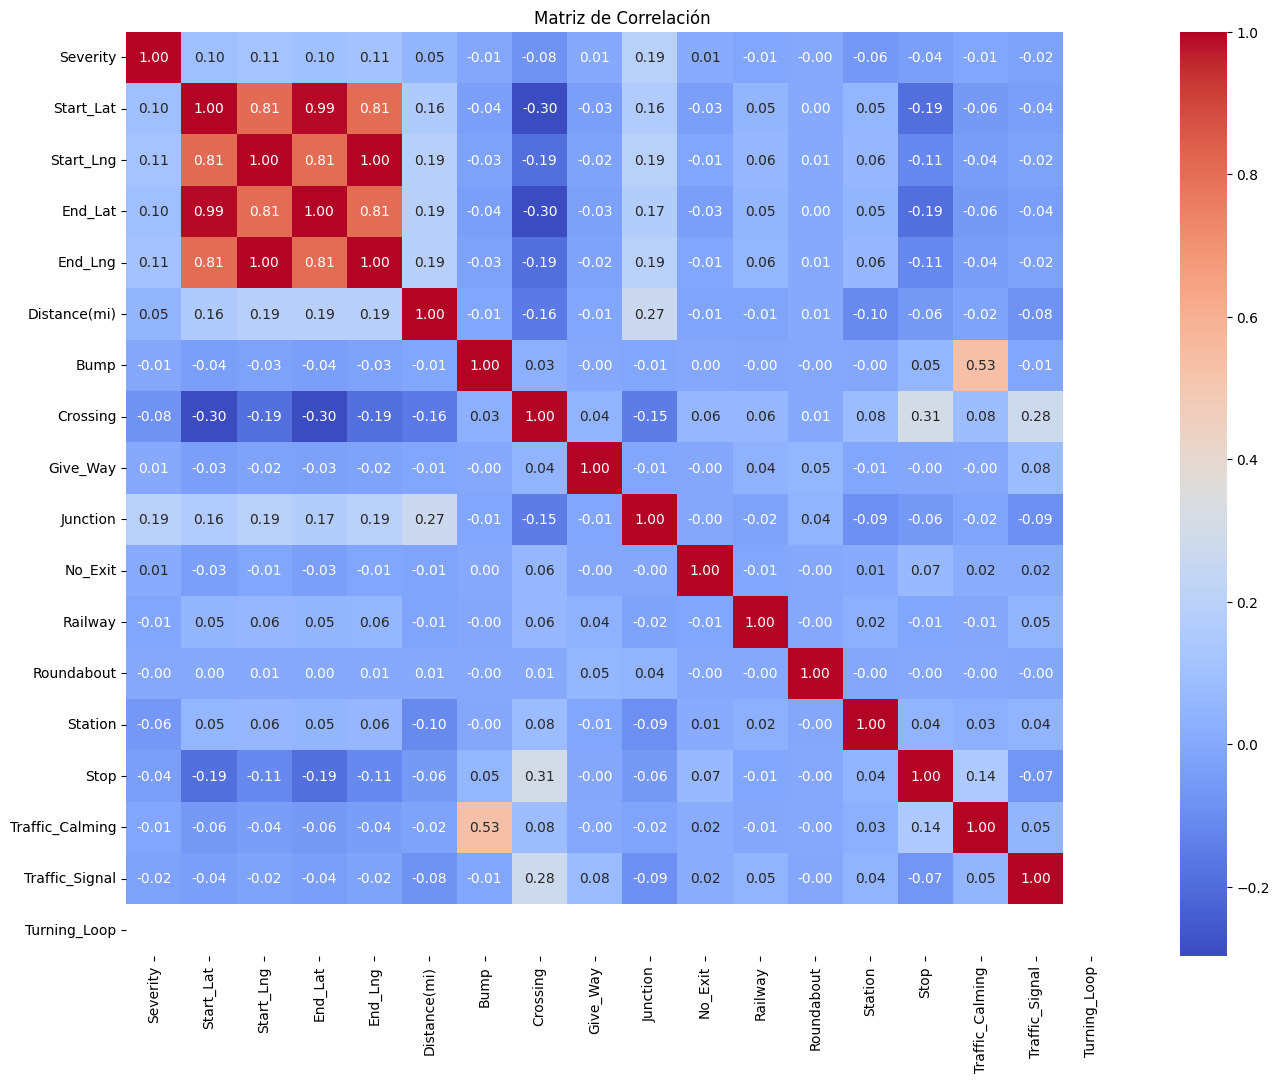

In [44]:
#Correlation matrix


# Boolean and numeric columns
columns_of_interest = ['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

# here we convert the boolean columns to numeric values 
df[columns_of_interest] = df[columns_of_interest].apply(lambda x: x.astype(int) if np.issubdtype(x.dtype, np.bool_) else x)

# Calculation of correlation matrix
corr_matrix = df[columns_of_interest].corr()


plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


What we can se here is that the start coordinates (Start_Lat, Start_Lng) and end coordinates (End_Lat, End_Lng) of accidents have an almost perfect correlation, which makes sense if accidents tend to happen at a fixed point and do not involve large distances between starting and ending points.

The severity (Severity) does not seem to have a strong correlation with the other numerical variables in the matrix, as most of its values are close to 0.

There are some moderate correlations between location-related features and traffic conditions (like Crossing, Junction, Traffic_Signal), but again, they are relatively low.

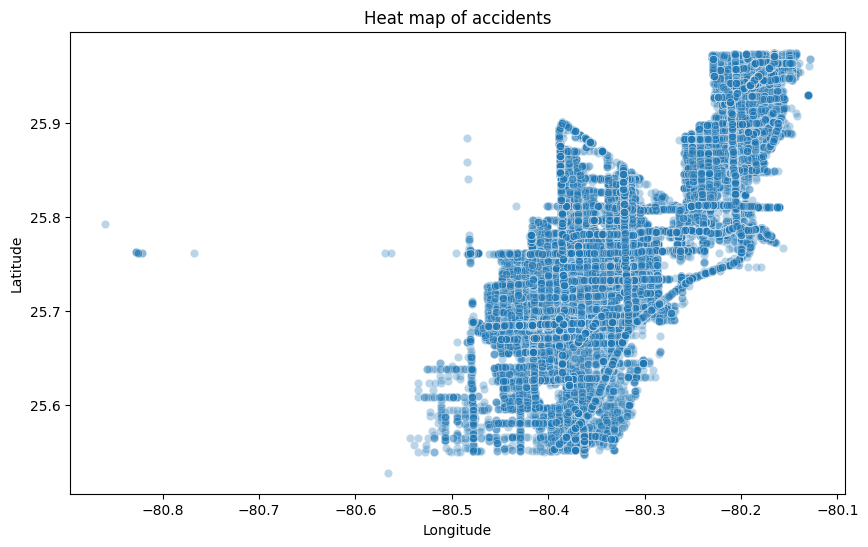

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Start_Lng', y='Start_Lat', alpha=0.3, data=df)
plt.title('Heat map of accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [46]:
'''sns.kdeplot(x=df['Start_Lng'], y=df['Start_Lat'], shade=True)
plt.title('Heat Map of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.figure(figsize=(10, 6))
plt.show()'''
#this one takes too long maybe because of the dirty data


"sns.kdeplot(x=df['Start_Lng'], y=df['Start_Lat'], shade=True)\nplt.title('Heat Map of Accidents')\nplt.xlabel('Longitude')\nplt.ylabel('Latitude')\nplt.figure(figsize=(10, 6))\nplt.show()"

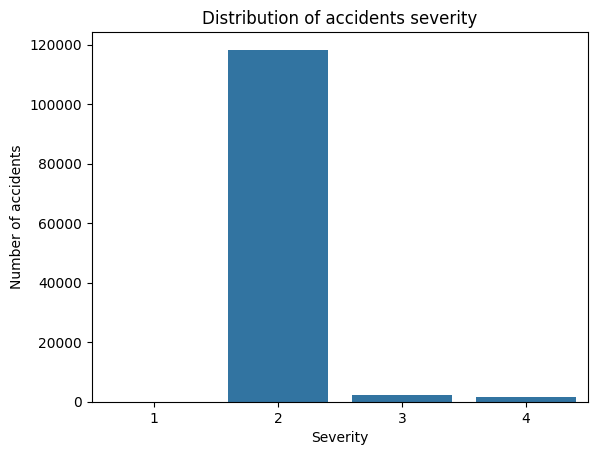

In [47]:
sns.countplot(x='Severity', data=df)
plt.title('Distribution of accidents severity')
plt.xlabel('Severity')
plt.ylabel('Number of accidents')
plt.show()


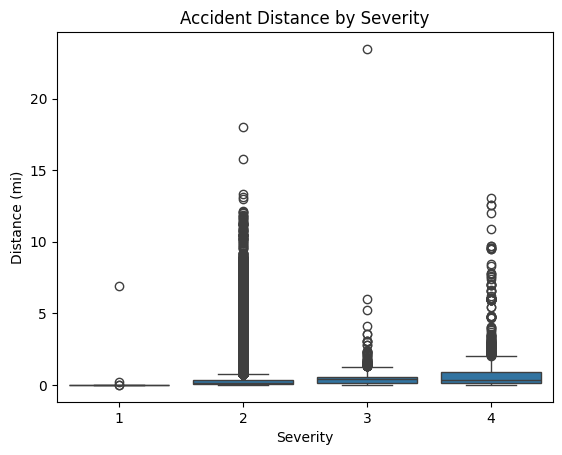

In [48]:
sns.boxplot(x='Severity', y='Distance(mi)', data=df)
plt.title('Accident Distance by Severity')
plt.xlabel('Severity')
plt.ylabel('Distance (mi)')
plt.show()



Severity 1 accidents have a tight distribution of distance, suggesting that when these accidents occur, the distance affected is consistently low.
Severity 2 and 3 accidents show a greater variation in the distance affected, with severity 2 having several outliers indicating some accidents affect a very long distance.
Severity 4 accidents seem to have a higher median distance affected than severity 1 and 3, and the spread is quite broad, but not as many outliers as severity 2. This could suggest that the most severe accidents consistently affect a larger distance.

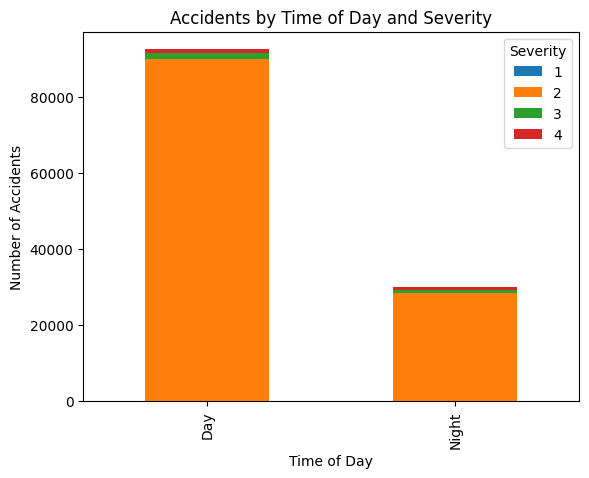

In [49]:
sunrise_sunset_severity = df.groupby(['Sunrise_Sunset', 'Severity']).size().unstack()
sunrise_sunset_severity.plot(kind='bar', stacked=True)
plt.title('Accidents by Time of Day and Severity')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()


C:\Users\Luis Delgado\AppData\Local\Temp\ipykernel_22684\2453103003.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['Severity'].mean().plot()


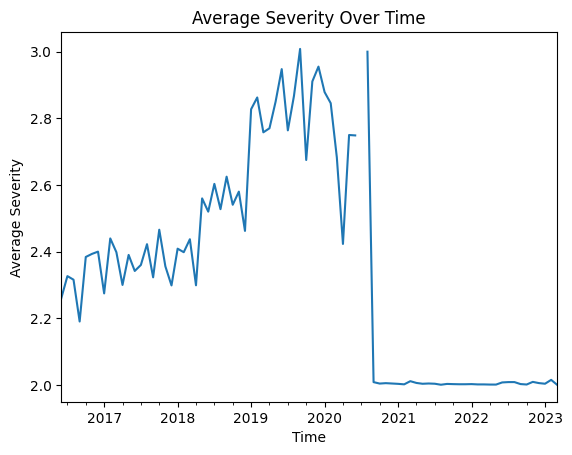

In [50]:

df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df.set_index('Start_Time', inplace=True)


df.resample('M')['Severity'].mean().plot()
plt.title('Average Severity Over Time')
plt.xlabel('Time')
plt.ylabel('Average Severity')
plt.show()

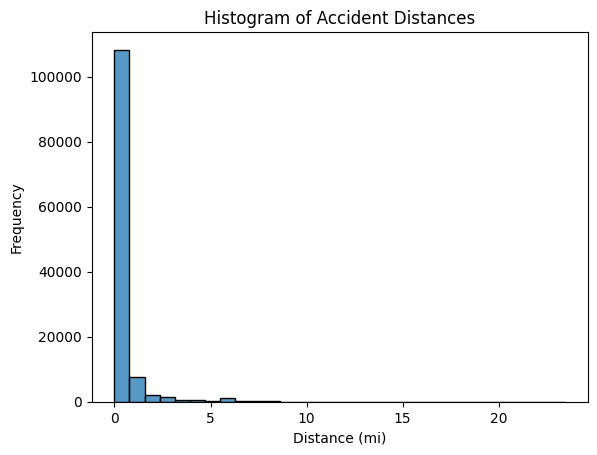

In [51]:
sns.histplot(df['Distance(mi)'], bins=30)
plt.title('Histogram of Accident Distances')
plt.xlabel('Distance (mi)')
plt.ylabel('Frequency')
plt.show()


High Frequency of Low-Distance Accidents: The first bar is much taller than the others, indicating that a significant number of accidents involved a very small distance. This could mean that most accidents are minor, with little to no movement of vehicles from their initial positions, or that the data is capturing many incidents where traffic wasn't affected over a large area.